# Lucia-Schwartz Model

The Lucia-Schwartz two-factor model for power prices is a mathematical model used to explain the behavior of electricity prices. The model assumes that electricity prices are determined by two 
factors: a short-term factor and a long-term factor. It was introduced in discussed in :footcite:t:`Lucia2002`.
The short-term factor is related to the current supply and demand conditions in the electricity market. This factor is influenced by factors such as weather conditions, maintenance schedules, and unexpected events such as power plant failures. 
The short-term factor is modeled using a mean-reverting process, which means that prices tend to move back towards their long-term average over time.
The long-term factor is related to the overall trends in the economy and the energy market. This factor is influenced by factors such as changes in 
fuel prices, technological advances, and government policies. The long-term factor is modeled using a random walk process, which means that prices tend to move in a random and unpredictable manner over time.
Overall, the Lucia-Schwartz two-factor model provides a useful framework for understanding the complex factors that influence electricity prices. By separating short-term and long-term factors, 
the model can help energy traders and analysts make more informed decisions about their 
trading strategies and risk management.

In [1]:
import sys
sys.path.append('../../../..')
import numpy as np
import matplotlib.pyplot as plt
import rivapy

%load_ext autoreload
%autoreload 2

C:\Users\doeltz\development\RiVaPy\docs\source\notebooks\models\../../../..\rivapy\__init__.py:11: UserWarning: The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.
  warnings.warn('The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.')


## Simulation of Spot

In [15]:
ls_model = rivapy.models.LuciaSchwartz(rho=-.81, kappa = 0.077, sigma1 = 0.1, mu=-0.29, sigma2=0.1)
n_sims = 10_000
timegrid = np.linspace(0.0,1.0,365)
rnd = np.random.normal(size=ls_model.rnd_shape(n_sims, timegrid.shape[0]))
paths = ls_model.simulate(timegrid, start_value=np.array([0.0,0.0]), rnd=rnd)

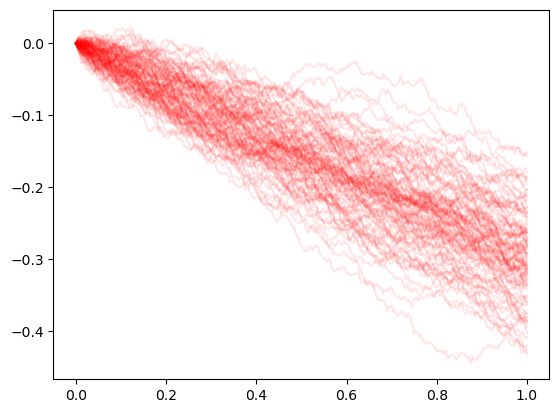

In [16]:
for i in range(100):
    plt.plot(timegrid, paths[:,i],'-r',alpha=0.1)

## Forward Values

In commodity markets the (liquidly) traded products are most often Forward contracts that fix a price (the forward value) for the delivery of product over a certain time intervall. The forward value may be approximated by the integral of a forward function $F(t,T)$ that describes the forward price for delivery at exactly one time point $T$
$$
F(t,T_1,T_2) = \frac{\int_{T_1}^{T_2}F(t,T)}{T_2-T_1}.
$$
This forward value can be computed for the Lucia-Schwartz Model via the method compute_fwd_value.

In [41]:
ls_model = rivapy.models.LuciaSchwartz(rho=-.81, kappa = 0.077, sigma1 = 0.3, mu=-0.029, sigma2=0.1)

In [19]:
ls_model.compute_fwd_value(np.array([0,0]), T1=0.2, T2=0.5)

-0.10149999999999998

We can also simulate the forward values via the method simulate by specifying the respective forward periods.

In [42]:
n_sims = 10_000
timegrid = np.linspace(0.0,1.0,365)
rnd = np.random.normal(size=ls_model.rnd_shape(n_sims, timegrid.shape[0]))
paths = ls_model.simulate(timegrid, start_value=np.array([0.0,0.0]), rnd=rnd, forwards=[(1.0,2.0)])

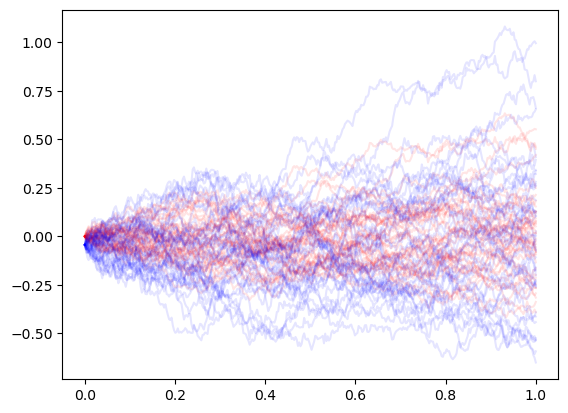

In [50]:
plt.plot(timegrid, paths[:,:40,0],'-r',alpha=0.1)
plt.plot(timegrid, paths[:,:40,1],'-b',alpha=0.1);    